# Exploratory Data Analysis for Earnings Transcript

## Import Statements
Pull in various libraries that may be useful. Play around with functionality.

In [7]:
import docx
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
from collections import Counter


In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to C:\Users\Vaclav
[nltk_data]     Barina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Vaclav
[nltk_data]     Barina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Vaclav
[nltk_data]     Barina\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Vaclav
[nltk_data]     Barina\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Data Wrangling
Use various basic functionality to play around with the data and see how clean we can make the input.

In [10]:
# Adjust the file path for your own system
doc = docx.Document(r"C:\Users\Vaclav Barina\Documents\3. Study\2. Data Science\1. Fun Projects\2023_Earnings Transcript Sentiment\1. BYND Data and Analysis\1. Raw Data\2019 Q4_BYND Earnings Transcript.docx")

In [11]:
# Extract text from document
text = ''
for para in doc.paragraphs:
    text += para.text

In [12]:
words = text.split() # Split text into words
print(words[:10]) # Print the first 10 words
words = [re.sub(r'[^\w\s]', '', word) for word in words] # Remove punctuation marks
words = [word.lower() for word in words] # Convert to lowercase

['Ladies', 'and', 'gentlemen,', 'thank', 'you', 'for', 'standing', 'by.', 'And', 'welcome']


In [13]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

## Initial Data Exploration
Using a word cloud and basic charts to visualize the data after cleaning. 

In [14]:
# calculate word frequencies using the Counter function
word_frequencies = Counter(words)

# create a WordCloud object using the wordcloud library
wordcloud = WordCloud().generate_from_frequencies(word_frequencies)

# create a plotly figure using the go.Image trace
fig = go.Figure(go.Image(z=wordcloud.to_array()))

# configure the plotly layout
fig.update_layout(title='My Word Cloud')

# display the plotly figure in a web browser
iplot(fig)

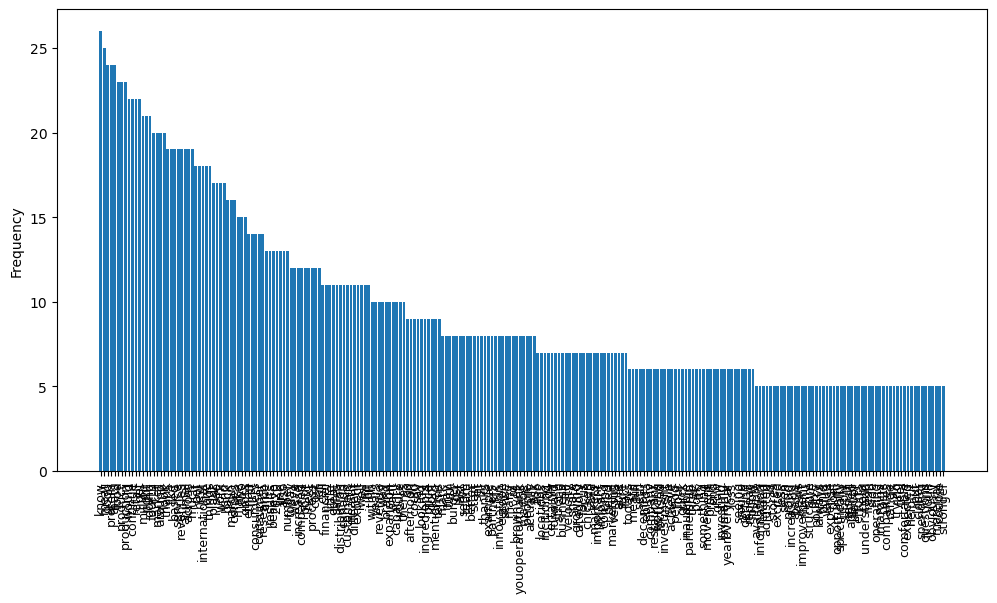

In [15]:
# filter out words that appear less than 5 times
word_frequencies = {k: v for k, v in word_frequencies.items() if v >= 5}

# remove the top 10 most frequent words
num_top_words = 10
word_frequencies = {k:v for k,v in sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)[10:]}

# create a bar chart
plt.figure(figsize=(12,6))
plt.bar(word_frequencies.keys(), word_frequencies.values())

# edit the chart settings
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=9)
plt.ylabel('Frequency')

plt.show()

## Additional Data Cleaning
Using additional functionality of NLTK to clean data.

In [8]:
# Apply stemming
stemmer = PorterStemmer()
words = [stemmer.stem(word) for word in words]

In [9]:
# Apply lemmatization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]

## Initial Sentiment Analysis
Usng the NLTK library to conduct sentiment analysis

In [41]:
# Create SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

word_data = []
for word, freq in Counter(words).items():
    scores = sia.polarity_scores(word)
    sentiment_score = scores['compound']
    word_data.append((word, sentiment_score, freq))

# sort the data by sentiment score (in descending order)
sorted_data = sorted(word_data, key=lambda x: x[1], reverse=True)

# create a list of the 50 most positive words
most_positive = sorted_data[:50]

# create a list of the 50 most negative words
most_negative = sorted_data[-50:]

# print the results
print("50 most positive words:")
for word, score, freq in most_positive:
    print(f"{word}: sentiment={score:.2f}, frequency={freq}")

print("\n50 most negative words:")
for word, score, freq in most_negative:
    print(f"{word}: sentiment={score:.2f}, frequency={freq}")

50 most positive words:
love: sentiment=0.64, frequency=4
best: sentiment=0.64, frequency=4
great: sentiment=0.62, frequency=11
outstanding: sentiment=0.61, frequency=2
congratulations: sentiment=0.60, frequency=1
amazing: sentiment=0.59, frequency=1
successful: sentiment=0.59, frequency=1
success: sentiment=0.57, frequency=2
thankful: sentiment=0.57, frequency=1
happy: sentiment=0.57, frequency=1
perfect: sentiment=0.57, frequency=1
precious: sentiment=0.57, frequency=1
wins: sentiment=0.57, frequency=1
remarkable: sentiment=0.56, frequency=1
rich: sentiment=0.56, frequency=1
positive: sentiment=0.56, frequency=3
superior: sentiment=0.54, frequency=1
peace: sentiment=0.54, frequency=1
enjoying: sentiment=0.53, frequency=1
gain: sentiment=0.53, frequency=2
kind: sentiment=0.53, frequency=17
congrats: sentiment=0.53, frequency=1
encouraging: sentiment=0.53, frequency=1
strong: sentiment=0.51, frequency=7
comfortable: sentiment=0.51, frequency=5
confidence: sentiment=0.51, frequency=1
pl